<a href="https://colab.research.google.com/github/AndreaWalrus/esercitazione5-23-24/blob/main/Introduction_to_colab_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
You can open this colab notebook in google:
<a href="https://colab.research.google.com/github/Sapienza-AI-Lab/esercitazione5-22-23/blob/main/Introduction_to_colab_and_ML.ipynb"><img align="auto" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In this tutorial, we will cover:

* Basic Colab: What is colab and how to use
* Numpy: Arrays, Array indexing
* Pandas: Introduction to the `DataFrame` and `Series` , Access and manipulate data , Import CSV data into a *pandas* `DataFrame`
* Matplotlib: Plotting, Subplots
* Machine Learning: Basics and how to use

The information is gathered from the following links [Welcome To Colaboratory](https://colab.research.google.com/drive/1b3Zkf9vQQp9H8hcG541EQb6kXnCck1jZ#scrollTo=-Rh3-Vt9Nev9) , [Introduction to Colab](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb#scrollTo=tEINf4bEL9jR) , [Intro-to-Pandas](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb#scrollTo=YHIWvc9Ms-Ll)

## What is Colab?

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist**,a **Machine learning Engineer**  or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

**Colab notebook** is an interactive environment that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [1]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [2]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Introduction to Shell Commands

When working interactively with the standard Python interpreter, one of the frustrations is the need to switch between multiple windows to access Python tools and system command-line tools.
IPython bridges this gap, and gives you a syntax for executing shell commands directly from within the IPython terminal.
The magic happens with the exclamation point: anything appearing after ``!`` on a line will be executed not by the Python kernel, but by the system command-line.

The following assumes you're on a Unix-like system, such as Linux or Mac OSX.
Some of the examples that follow will fail on Windows, which uses a different type of shell by default (though with the 2016 announcement of native Bash shells on Windows, soon this may no longer be an issue!).
If you're unfamiliar with shell commands, I'd suggest reviewing the [Shell Tutorial](http://swcarpentry.github.io/shell-novice/) put together by the always excellent Software Carpentry Foundation.

### Shell Commands in IPython

Any command that works at the command-line can be used in IPython by prefixing it with the ``!`` character.
For example, the ``ls``, ``pwd``, and ``echo`` commands can be run as follows:

```ipython
In [1]: !ls
myproject.txt

In [2]: !pwd
/home/jake/projects/myproject

In [3]: !echo "printing from the shell"
printing from the shell
```

### Passing Values to and from the Shell

Shell commands can not only be called from IPython, but can also be made to interact with the IPython namespace.
For example, you can save the output of any shell command to a Python list using the assignment operator:

```ipython
In [4]: contents = !ls

In [5]: print(contents)
['myproject.txt']

In [6]: directory = !pwd

In [7]: print(directory)
['/Users/jakevdp/notebooks/tmp/myproject']
```

Note that these results are not returned as lists, but as a special shell return type defined in IPython:

```ipython
In [8]: type(directory)
IPython.utils.text.SList
```

This looks and acts a lot like a Python list, but has additional functionality, such as
the ``grep`` and ``fields`` methods and the ``s``, ``n``, and ``p`` properties that allow you to search, filter, and display the results in convenient ways.
For more information on these, you can use IPython's built-in help features.

Communication in the other direction–passing Python variables into the shell–is possible using the ``{varname}`` syntax:

```ipython
In [9]: message = "hello from Python"

In [10]: !echo {message}
hello from Python
```

The curly braces contain the variable name, which is replaced by the variable's contents in the shell command.

### Shell-Related Magic Commands

If you play with IPython's shell commands for a while, you might notice that you cannot use ``!cd`` to navigate the filesystem:

```ipython
In [11]: !pwd
/home/jake/projects/myproject

In [12]: !cd ..

In [13]: !pwd
/home/jake/projects/myproject
```

The reason is that shell commands in the notebook are executed in a temporary subshell.
If you'd like to change the working directory in a more enduring way, you can use the ``%cd`` magic command:

```ipython
In [14]: %cd ..
/home/jake/projects
```

In fact, by default you can even use this without the ``%`` sign:

```ipython
In [15]: cd myproject
/home/jake/projects/myproject
```

This is known as an ``automagic`` function, and this behavior can be toggled with the ``%automagic`` magic function.

Besides ``%cd``, other available shell-like magic functions are ``%cat``, ``%cp``, ``%env``, ``%ls``, ``%man``, ``%mkdir``, ``%more``, ``%mv``, ``%pwd``, ``%rm``, and ``%rmdir``, any of which can be used without the ``%`` sign if ``automagic`` is on.
This makes it so that you can almost treat the IPython prompt as if it's a normal shell:

```ipython
In [16]: mkdir tmp

In [17]: ls
myproject.txt  tmp/

In [18]: cp myproject.txt tmp/

In [19]: ls tmp
myproject.txt

In [20]: rm -r tmp
```

This access to the shell from within the same terminal window as your Python session means that there is a lot less switching back and forth between interpreter and shell as you write your Python code.

## Introduction to Python Libraries

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, **pandas** to access and manipulate data in dataframes and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can use colab to access Python3. Python 3.* loads as the default version and can be changed to Python 2 or upgraded/downgraded to a specific version.

In [3]:
!python --version

Python 3.11.13


## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [4]:
import numpy as np

### Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [5]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [6]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [7]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [8]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [9]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [10]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [11]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [12]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.07172751 0.99555234]
 [0.53208969 0.95346883]]


###Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [13]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [14]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [15]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [16]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


## Pandas

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.
The following line imports the *pandas* API and prints the API version:

In [17]:
from __future__ import print_function

import pandas as pd
pd.__version__

'2.2.2'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

One way to create a `Series` is to construct a `Series` object. For example:

In [18]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

,0
0,San Francisco
1,San Jose
2,Sacramento


`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [19]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [20]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [21]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

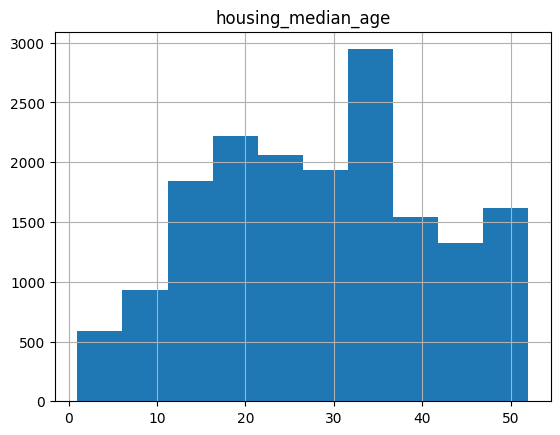

In [22]:
california_housing_dataframe.hist('housing_median_age')

### Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [23]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


,City name
0,San Francisco
1,San Jose
2,Sacramento


In [24]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [25]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

### Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [26]:
population / 1000.

,0
0,852.469
1,1015.785
2,485.199


For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map),
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [28]:
population.apply(lambda val: val > 1000000)

,0
0,False
1,True
2,False



Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [29]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


### Sample Exercise

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.

**Hint:** "San" in Spanish means "saint."

In [47]:
cities['City name'].str.match(r"San \w+")&cities['Area square miles'].apply(lambda val: val>50)
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


In [42]:
# Try writing your code here
cities['Is wide and has saint name'] = pd.Series(cities['City name'].str.match(r"San \w+")&cities['Area square miles'].apply(lambda val: val>50))


,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


Click below for a solution.

In [ ]:
#@title Solution { display-mode: "form" }
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

### Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row.

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [43]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [44]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [48]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [50]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


##Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [51]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [52]:
%matplotlib inline

###Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

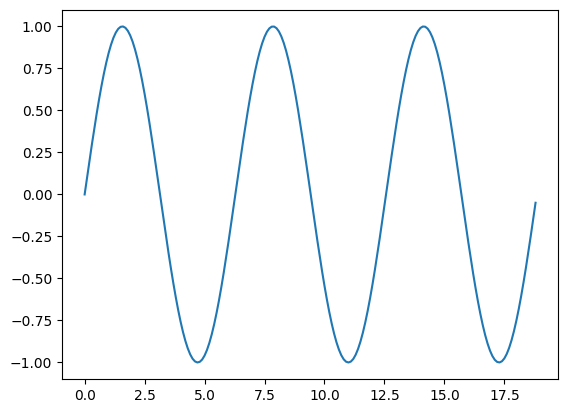

In [54]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 6 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

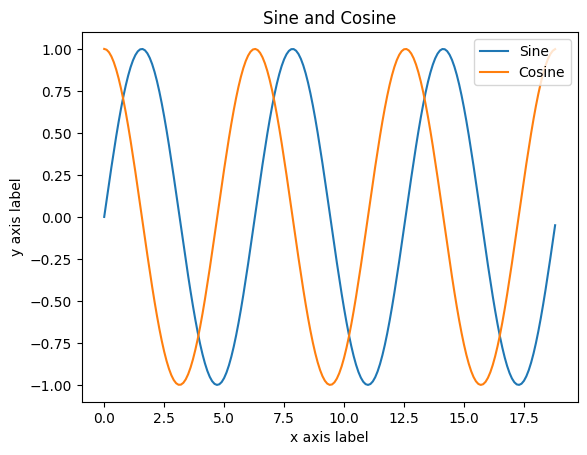

In [55]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

###Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

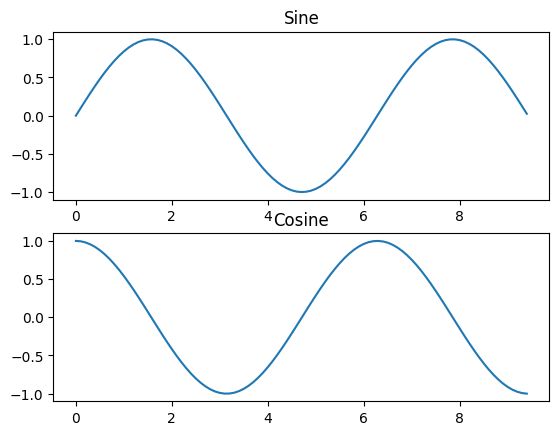

In [56]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html).

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Working with Data
<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)